In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("xtick",labelsize = 15)
plt.rc("ytick",labelsize = 15)


In [4]:
data = pd.read_csv('jla_mub_0.txt', delimiter =" " , header = None)   # use header = None ; else pandas read 1st row as a header and not as a data 

cov_data = pd.read_csv("jla_mub_covmatrix.txt", header = None)
data1 = data.to_numpy()



cov_data1 = cov_data.to_numpy()
C = cov_data1.reshape(31,31)  # covariance matrix


In [5]:
C_inv = np.linalg.inv(C)

In [6]:
# loading values into separate columns
z = data1[:,0] # redshift 
mu_data = data1[:,1] # mu values

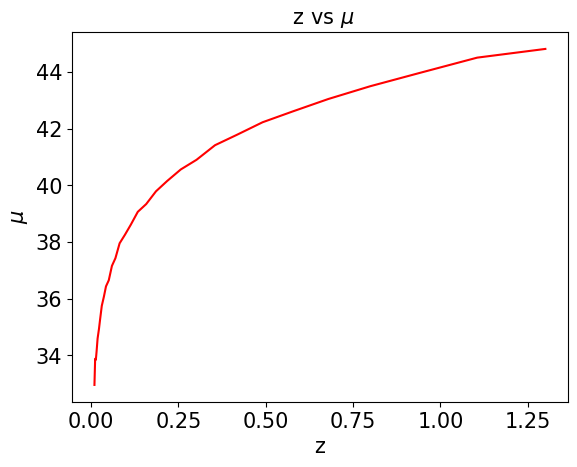

In [7]:
plt.title(" z vs $\mu$", fontsize =15)
plt.xlabel("z" , fontsize = 15)
plt.ylabel("$\mu$" , fontsize = 15)
plt.plot(z,mu_data , color ="red")
#plt.savefig("plot 1s .pdf")

In [8]:
def eta(a, omg):
  s = ((1 - omg) / omg )**(1/3)
  c = 2 * (((s**3) + 1)**(0.5))
  h = ((1/a**4) - (0.1540 * (s/(a**3))) + (0.4304 * ((s/a)**2)) + (0.19097 * ((s**3)/a)) + (0.066941 *(s**4)))
  return c * (h**(- 1/8))

In [9]:
def D_l(h, z , omega_m): # D_l* (D_l where h = 1)
  c = 3 * (10**5)
  #h = 1 
  Ho = 100 
  r = eta(1, omega_m) - eta((1/(1+z)), omega_m)
  return (c/Ho) * (1+z) * r

In [10]:
def mu(h,z,omega_m):
  return 25  + (5 * np.log10(D_l(h,z,omega_m))) - (5 * np.log10(h))

In [11]:
def likelihood (h,z,omega_m):  # log likelihood
  #u = 0
  u = 0
  mu_theory = mu(h,z,omega_m)
  if h<0 or h>1 or omega_m < 0.2 or omega_m >1 : return -np.inf
  else:
    for i in range(31):
      for j in range(31):
        u += (mu_data[i] - mu_theory[i]) * C_inv[i,j] * (mu_data[j] - mu_theory[j])
  return ((-0.5) * u)

In [12]:
def prior(h):
  m = 0.738
  s = 0.024

  return (1/(np.sqrt(2 * np.pi)* s)) * np.exp(-((h - m)/s)**2)

In [13]:
def MCMC(sig,n):   # sigma , no. of iterations
 
  h0 = np.random.uniform(0,1)  #  randomly initializing
  omg0 = np.random.uniform(0,1) #   randomly initializing
  burn_in = int(0.1 * n)
  

  h_wp = np.zeros(n)  # wp = without prior
  omg_wp = np.zeros(n)
  acpt_no_wp = 0
  h_wp[0] = h0
  omg_wp[0] = omg0
  h_p = np.zeros(n)  # p = with  prior
  omg_p = np.zeros(n)
  acpt_no_p = 0
  h_p[0] = h0
  omg_p[0] = omg0
  
  for i in range (1,n):
    
    h = np.random.normal(h0,sig)
    omg = np.random.normal(omg0,sig)
    f = (np.exp(likelihood(h,z,omg)) * prior(h)) / (np.exp(likelihood(h0,z,omg0)) * prior(h0)) # prior
    y = (np.exp((likelihood(h,z,omg)) - (likelihood(h0,z,omg0))))  # without prior
    f1 = min((f,1))
    y1 = min((y,1))
    g = np.random.uniform(0,1)
    
    if g < f1:
      h0 = h
      omg0 = omg
      if i > burn_in:  # counting after  burn-in
        acpt_no_p+=1
    else : 
      h0 = h0
      omg0 = omg0
    h_p[i] = h0     # with prior
    omg_p[i] = omg0
    hp_burnt = h_p[burn_in : ]
    omgp_burnt = omg_p[burn_in :]
    if g < y1:
      h0 = h
      omg0 = omg
      if i > burn_in:  # counting after  burn-in
        acpt_no_wp+=1
    else : 
      h0 = h0
      omg0 = omg0  

    h_wp[i] = h0        # without prior
    omg_wp[i] = omg0
    hwp_burnt = h_wp[burn_in : ]
    omgwp_burnt = omg_wp[burn_in :]
  return h_p , h_wp, omg_p, omg_wp, hp_burnt , hwp_burnt , omgp_burnt , omgwp_burnt  , acpt_no_p , acpt_no_wp ,  burn_in # mu_accepted  

In [14]:
Hp, Hwp,Op, Owp, hp1 , hwp1 , op1 , owp1 , ap, awp , b1 = MCMC(0.05,5000)
#MCMC(0.05,5000)
#omg_hist = MCMC(0.05)[1]

In [15]:
len(Hp)

5000

Text(0.5, 1.0, '$\\Omega_m $')

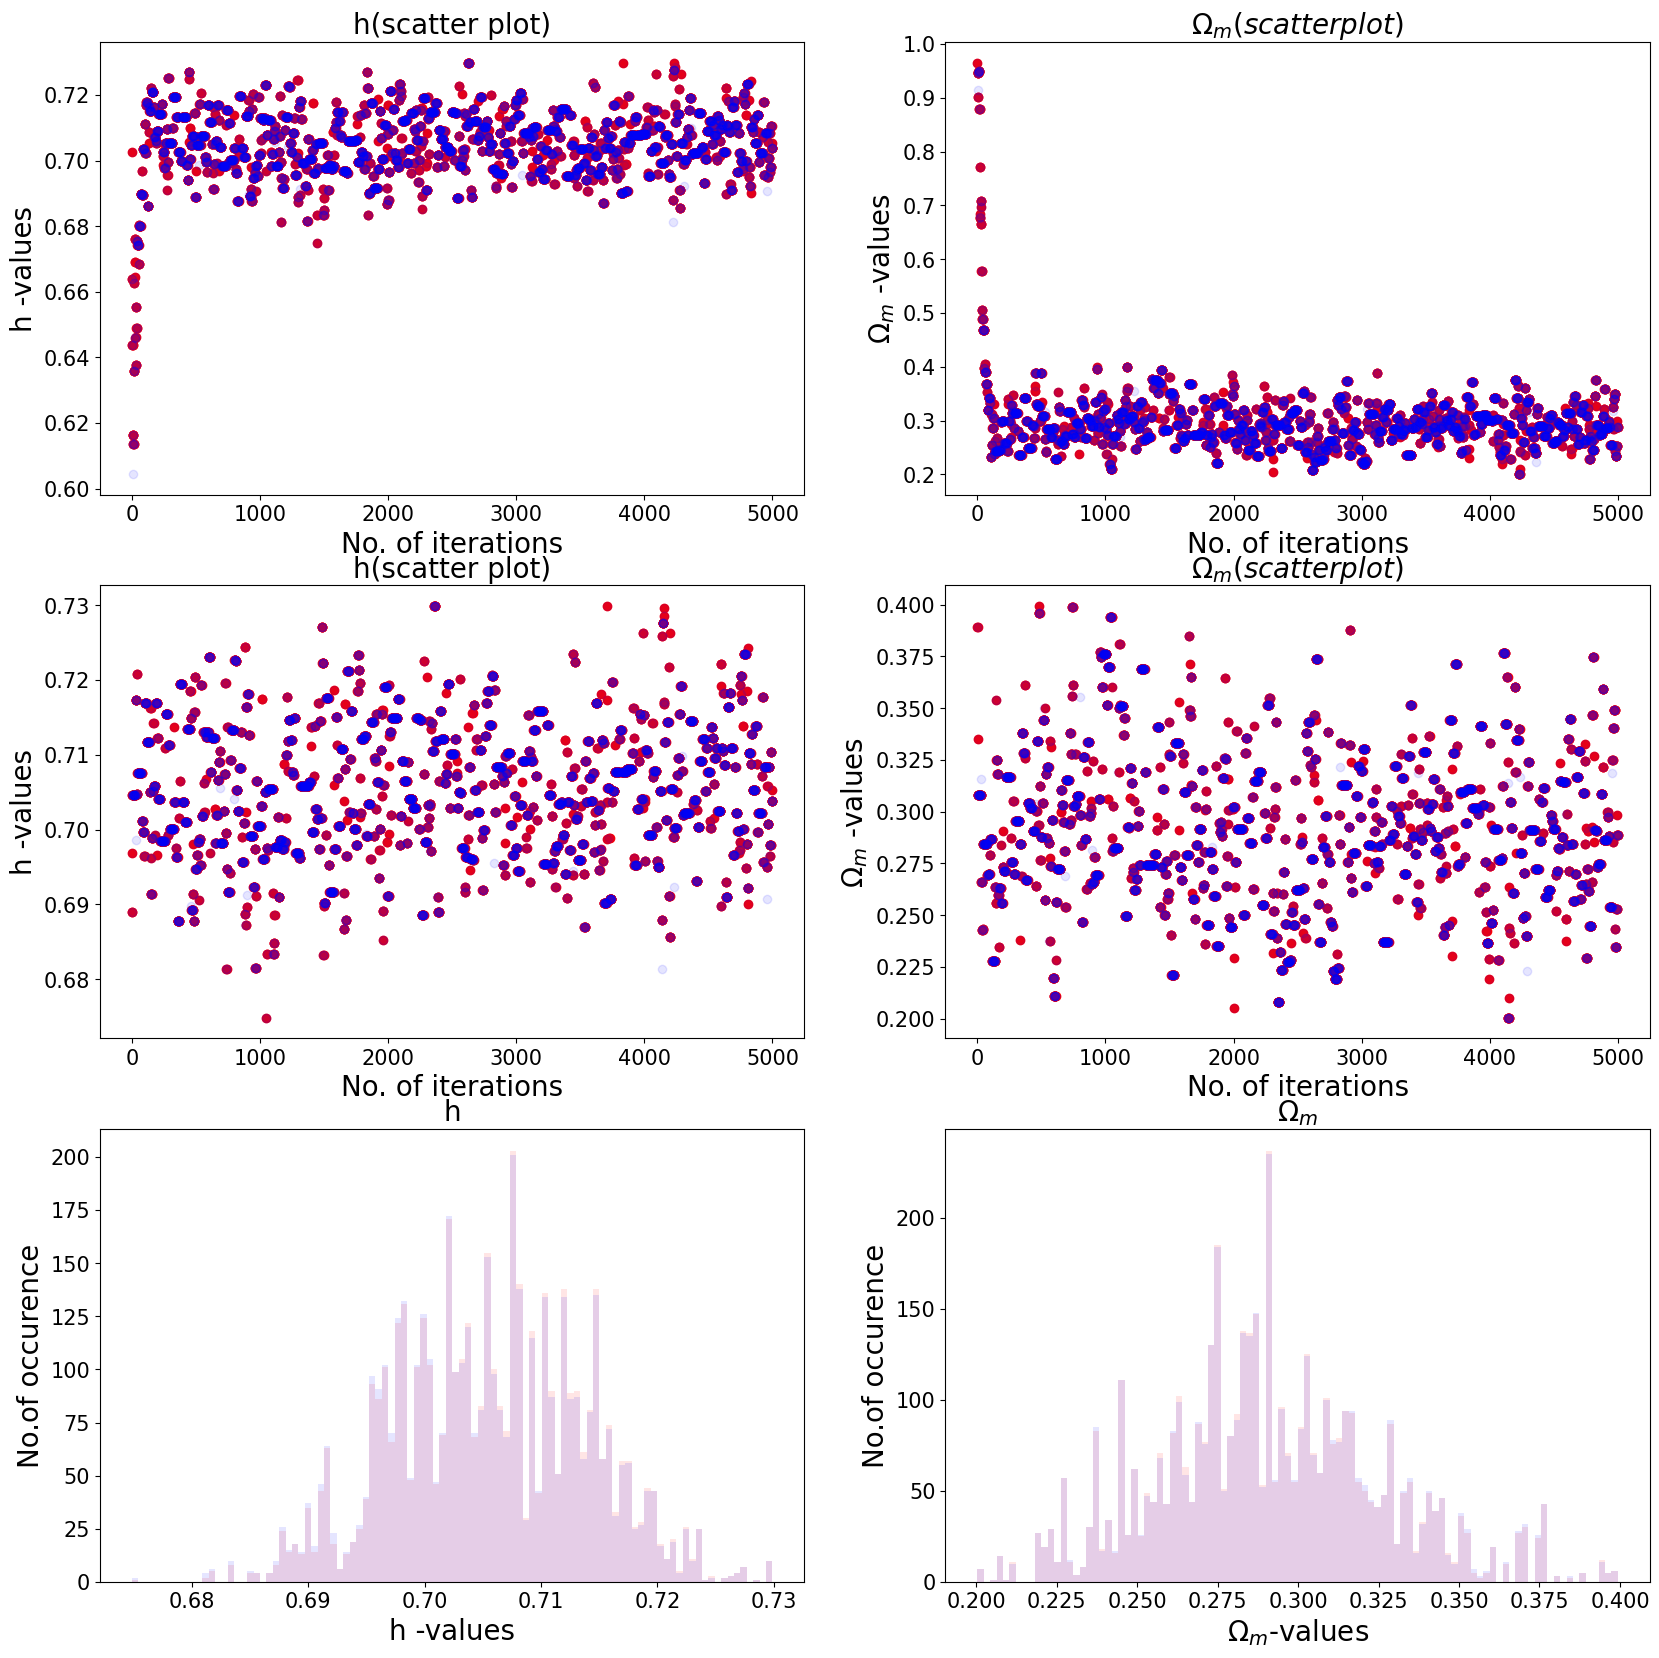

In [35]:
i = np.linspace(0,5000,4500)
j = np.linspace(0,5000,5000)
plt.figure (figsize = (20,20))
plt.subplot(3,2,1)
plt.xlabel("No. of iterations" , fontsize = 20)
plt.ylabel("h -values",fontsize = 20)
plt.scatter(j,Hp, color ="red" )
plt.scatter(j,Hwp, color ="blue", alpha = 0.1 )

plt.title('h(scatter plot)',fontsize= 20)

plt.subplot(3,2,2)
plt.xlabel("No. of iterations",fontsize = 20)
plt.ylabel("$\Omega_m$ -values",fontsize = 20)
plt.scatter(j,Op , color ="red")
plt.scatter(j,Owp, color ="blue", alpha = 0.1)
plt.title('$\Omega_m(scatter plot) $',fontsize= 20)

plt.subplot(3,2,3)
plt.xlabel("No. of iterations" , fontsize = 20)
plt.ylabel("h -values",fontsize = 20)
plt.scatter(i,hp1, color ="red" )
plt.scatter(i,hwp1, color ="blue", alpha = 0.1 )

plt.title('h(scatter plot)',fontsize= 20)

plt.subplot(3,2,4)
plt.xlabel("No. of iterations",fontsize = 20)
plt.ylabel("$\Omega_m$ -values",fontsize = 20)
plt.scatter(i,op1 , color ="red")
plt.scatter(i,owp1, color ="blue", alpha = 0.1)
plt.title('$\Omega_m(scatter plot) $',fontsize= 20)





plt.subplot(3,2,5)
plt.ylabel("No.of occurence",fontsize = 20)
plt.xlabel("h -values",fontsize = 20)
plt.hist(hp1,color ="red" ,alpha = 0.1, bins = 100)
plt.hist(hwp1,color ="blue", alpha = 0.1 , bins = 100)
plt.title('h',fontsize = 20)

plt.subplot(3,2,6)
plt.ylabel("No.of occurence",fontsize = 20)
plt.xlabel("$\Omega_m$-values",fontsize = 20)

plt.hist(op1 , color ="red" ,alpha = 0.1, bins =100)
plt.hist(owp1,color ="blue", alpha = 0.1 , bins = 100)
plt.title('$\Omega_m $',fontsize = 20)

#plt.savefig("o.pdf")

In [17]:
mean_hp = np.mean(hp1) # with prior
mean_hwp = np.mean(hwp1) # without prior

mean_omgp = np.mean(op1) # with prior
mean_omgwp = np.mean(owp1) # without prior



In [18]:
print("h_mean with prior",mean_hp)
print("h_mean without prior", mean_hwp)
print("omega_mean with prior", mean_omgp)
print("omega_mean without prior", mean_omgwp)

h_mean with prior 0.705642451831866
h_mean without prior 0.7053946182000475
omega_mean with prior 0.2909807267886578
omega_mean without prior 0.2913012436155503


# Gelman Rubin test for convergence 

In [19]:
def GR_test(l):

  J = 4

  qph =[] # mean
  qwph = []
  qsph =[] # variance
  qswph = []
  qpo = []
  qwpo = []
  qspo = []
  qswpo = []
  for d in range(1,10):
    q1,q2,q3,q4,q5,q6,q7,q8,q9, q10, L = MCMC(0.1,l)
    q1_mean = np.mean(q1) # chain mean with prior
    q2_mean = np.mean(q2) # chain mean without prior
    q1_sd = (np.std(q1))
    q2_sd = (np.std(q2))
    q3_mean = np.mean(q3) # chain mean with prior
    q4_mean = np.mean(q4) # chain mean without prior
    q3_sd = (np.std(q3))
    q4_sd = (np.std(q4))
    qph.append(q1_mean) # prior
    qwph.append(q2_mean) # without prior
    qsph.append(q1_sd**2) # prior
    qswph.append(q2_sd**2) # without prior
    qpo.append(q3_mean) # prior
    qwpo.append(q4_mean) # without prior
    qspo.append(q3_sd**2) # prior
    qswpo.append(q4_sd**2) # without prior



  qph_grndmean = np.mean(qph)  # grand mean with prior
  qwph_grndmean = np.mean(qwph) # grand mean without  prior

  qpo_grndmean = np.mean(qpo)  # grand mean with prior
  qwpo_grndmean = np.mean(qwpo) # grand mean without  prior

  sig_chain_ph = np.mean(qsph)  # avg. of individual chain variances
  sig_chain_wph = np.mean(qswph)

  sig_chain_po = np.mean(qspo)  # avg. of individual chain variances
  sig_chain_wpo = np.mean(qswpo)




  W_ph = np.sum((qph - qph_grndmean)**2) / J
  W_wph = np.sum((qwph - qwph_grndmean)**2) / J

  W_po = np.sum((qpo - qpo_grndmean)**2) / J
  W_wpo = np.sum((qwpo - qwpo_grndmean)**2) / J


  R_ph = (((J - 1)/J) * sig_chain_ph + (1/J) * W_ph)/ sig_chain_ph    # Gelman-Rubin statistic

  R_wph =  (((J - 1)/J) * sig_chain_wph + (1/J) * W_wph)/ sig_chain_wph # Gelman-Rubin statistic


  R_po = (((J - 1)/J) * sig_chain_po + (1/J) * W_po)/ sig_chain_po    # Gelman-Rubin statistic

  R_wpo =  (((J - 1)/J) * sig_chain_wpo + (1/J) * W_wpo)/ sig_chain_wpo # Gelman-Rubin statistic

  return R_ph , R_wph , R_po , R_wpo


In [20]:
L = np.array ([20,50,80,100,200, 300, 500, 900, 1000, 2000])
rp = []
rwp = []
rpo = []
rwpo = []
for k in range(len(L)):
  a , b , c, d = GR_test(L[k])
  rp.append(a)
  rwp.append(b)
  rpo.append(c)
  rwpo.append(d)

<ipython-input-13-6c071744c429>:23: RuntimeWarning: invalid value encountered in double_scalars
  f = (np.exp(likelihood(h,z,omg)) * prior(h)) / (np.exp(likelihood(h0,z,omg0)) * prior(h0)) # prior
<ipython-input-13-6c071744c429>:24: RuntimeWarning: overflow encountered in exp
  y = (np.exp((likelihood(h,z,omg)) - (likelihood(h0,z,omg0))))  # without prior
<ipython-input-13-6c071744c429>:23: RuntimeWarning: divide by zero encountered in double_scalars
  f = (np.exp(likelihood(h,z,omg)) * prior(h)) / (np.exp(likelihood(h0,z,omg0)) * prior(h0)) # prior
<ipython-input-10-c7ecd78e8ea5>:2: RuntimeWarning: invalid value encountered in log10
  return 25  + (5 * np.log10(D_l(h,z,omega_m))) - (5 * np.log10(h))


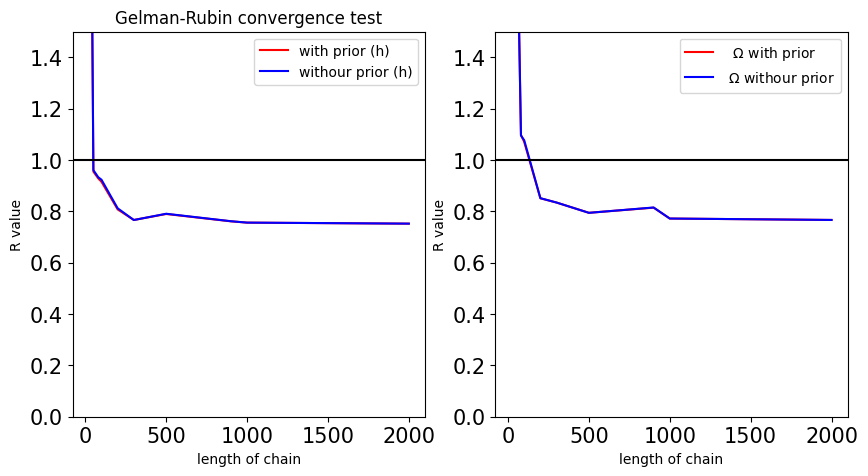

In [24]:
# plt.title("Gelman-Rubin convergence test", fontsize = 5)
# plt.xlabel("length of chain", fontsize = 5)
# plt.ylabel("R value")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Gelman-Rubin convergence test")
plt.xlabel("length of chain")
plt.ylabel("R value")
plt.ylim(0,1.5)
plt.plot(L,rp, color = "red" , label = "with prior (h)")
plt.plot(L,rwp , color = "blue" , label = "withour prior (h)")
plt.axhline(y = 1 , color ="black")
plt.legend()
plt.subplot(1,2,2)
#plt.title("Gelman-Rubin convergence test")
plt.xlabel("length of chain")
plt.ylabel("R value")
plt.ylim(0,1.5)
plt.plot(L,rpo, color = "red" , label = "  $\Omega$ with prior")
plt.plot(L,rwpo , color = "blue" , label = " $\Omega$ withour prior ")
plt.axhline(y = 1 , color ="black")
plt.legend()
plt.show()

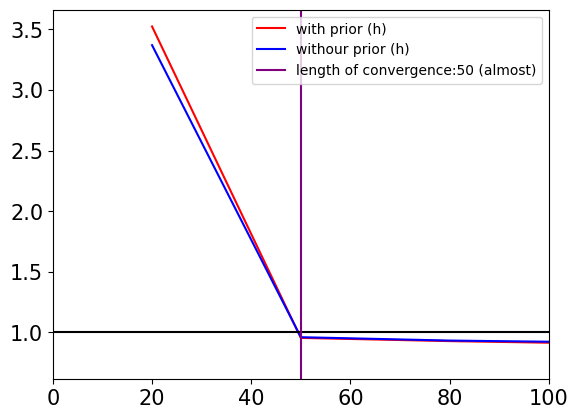

In [28]:
plt.xlim(0,100)
plt.plot(L,rp, color = "red" , label = "with prior (h)")
plt.plot(L,rwp , color = "blue" , label = "withour prior (h)")
plt.axhline(y = 1 , color ="black")
plt.axvline(x = 50 , color = "purple" , label = "length of convergence:50 (almost)")
plt.legend()

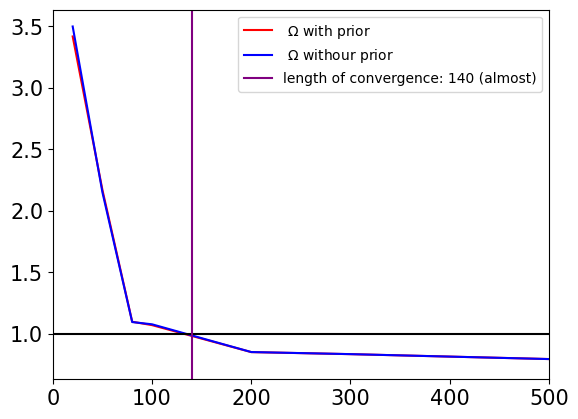

In [33]:
plt.xlim(0,500)
plt.plot(L,rpo, color = "red" , label = " $\Omega$ with prior")
plt.plot(L,rwpo , color = "blue" , label = " $\Omega$ withour prior")
plt.axhline(y = 1 , color ="black")
plt.axvline(x = 140 , color = "purple" , label = "length of convergence: 140 (almost)")
plt.legend()

from the plots , it is deduced that length of chain should be atleast 140 